In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [22]:
dados = pd.read_csv('dados/aluguel.csv', sep = ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [23]:
area=plt.figure()
#criamos uma area branca para colocarmos nossos graficos dentro

<Figure size 1080x576 with 0 Axes>

In [24]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [25]:
# isso quer dizer que dentro dessa figura vao ter 4 graficos, 
#duas linhas e duas colunas e esse fica na posicao 1


In [28]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor X Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100) 
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')
# esse é um grafico que pega aeatoriamente uma amostra e plota o seus valores
#sempre que eu colocar "cell" "run all" esse grafico vai mudar

grupo = dados.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

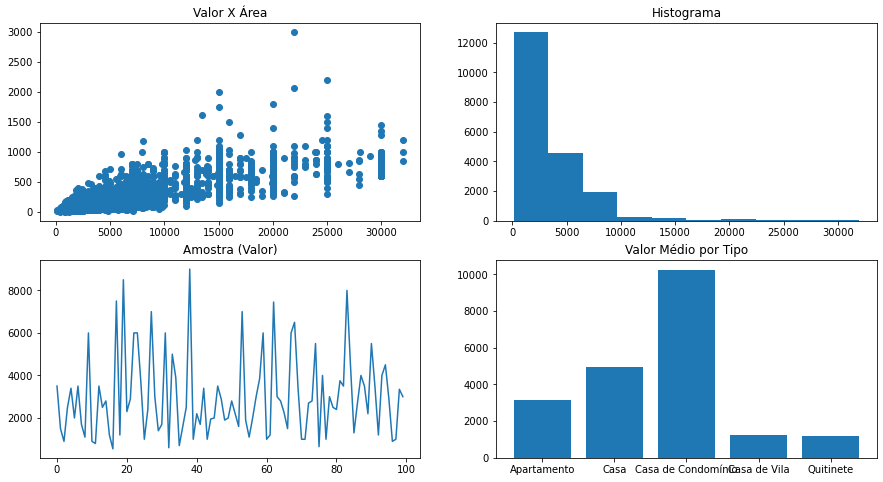

In [27]:
area

In [29]:
# salvando nessa pasta
area.savefig('grafico.png', dpi=300, bbox_inches='tight')

Exercicio:
Considere neste exercício o arquivo aluguel_amostra.csv e faça um gráfico de pizza

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

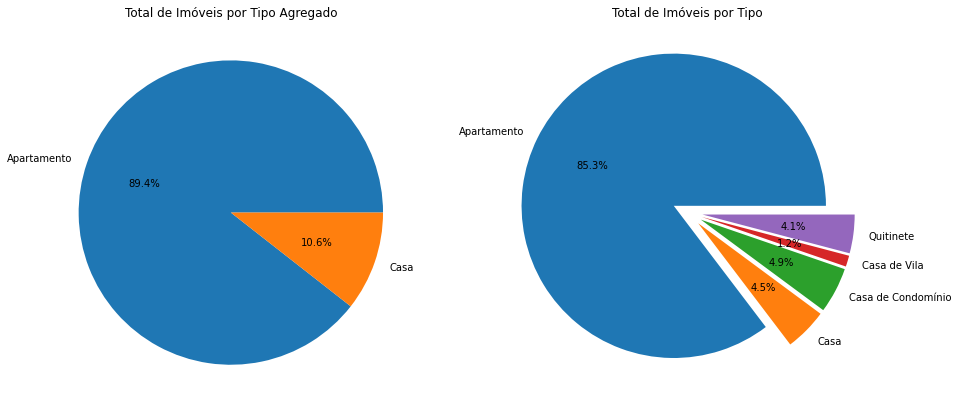

In [36]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')


O parâmetroexplode é utilizado para destacar as "fatias" do seu gráfico. Observe por exemplo, o segundo gráfico. Nele vemos que as partes estão mais separadas entre si, como se o gráfico tivesse sido "explodido". É para dar esse efeito que esse parâmetro serve, sendo que, quanto maior for o número que você passar para esse parâmetro, mais distante ficarão as partes do gráfico que você desejar destacar.

Em relação ao autopct, esse é utilizado para colocar as labels em cada fatia do seu gráfico, ou seja, a porcentagem referente a cada parte. No caso do nosso gráfico, ao fazer autopct='%1.1f%%' estamos definindo o formato que queremos que nossa porcentagem apareça no gráfico, que nesse caso seria com no máximo uma casa decimal. Caso você quisesse que fosse com no máximo duas casas decimais, por exemplo, você poderia escrever: autopct='%1.2f%%' e assim por diante. Essef, que é passado para o parâmetro, significa float, que é um tipo de dado utilizado para representar números decimais.

É selecionada a coluna Valor após o groupby apenas para simplificar, já que aqui queremos apenas a contagem precisamos apenas de uma coluna, e nesse caso nem importa qual é essa coluna, utilizando Tipo ou Bairro no lugar de Valor o resultado vai ser o mesmo, pois estamos apenas contando o total de linhas na coluna selecionada.